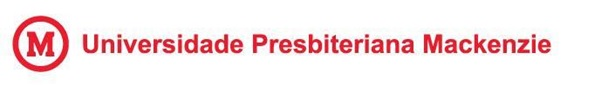

Projeto Aplicado Turma A Alunas:

CAMILLA SEMENZZATTO CAVALCANTE - RA 10423722

CAROLINA IACONELLI - RA 10424853

ISABELLE DOS SANTOS SANTANA - RA 10416118

MARISTELA PEDRO COELHO - RA 10424465

IMPORTANDO BIBLIOTECAS EXPLORATÓRIAS DO PYTHON

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns




# Informações sobre a Utlização do cartão de crédito

Base de dados sobre a utilização de cartão de crédito durante os períodos de 2018 até 2023

Fonte do Dado:https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/aplicacao#!/recursos/Quantidadeetransacoesdecartoes

In [4]:
dados_cartoes= pd.read_csv('/content/Estoque.csv', sep=';')

In [5]:
dados=dados_cartoes.drop(columns=['Unnamed: 10','Unnamed: 11'] )

In [6]:
dados.head()

,trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais
0,20213,Bandeira propria,Credito,Basico Nacional,1938972,535612,2741493,521339586,0,0
1,20232,VISA,Credito,Empresarial,3521641,2173436,41594872,12547655589,468389,396967163
2,20213,VISA,Debito,Intermediario,3745393,2347388,59581444,4814915281,490,101639
3,20211,MasterCard,Debito,Basico Internacional,83088117,21554284,567370086,39064611986,27511,9502222
4,20211,MasterCard,Credito,Premium,2197074,1785104,107175156,21107092218,1234605,631224037


In [7]:
dados.columns

Index(['trimestre', 'nomeBandeira', 'nomeFuncao', 'produto',
       'qtdCartoesEmitidos', 'qtdCartoesAtivos', 'qtdTransacoesNacionais',
       'valorTransacoesNacionais', 'qtdTransacoesInternacionais',
       'valorTransacoesInternacionais'],
      dtype='object')

In [8]:
dados.dtypes

trimestre                         int64
nomeBandeira                     object
nomeFuncao                       object
produto                          object
qtdCartoesEmitidos                int64
qtdCartoesAtivos                  int64
qtdTransacoesNacionais            int64
valorTransacoesNacionais          int64
qtdTransacoesInternacionais       int64
valorTransacoesInternacionais     int64
dtype: object

In [9]:
dados.shape

(1630, 10)

In [10]:
dados.nunique()

trimestre                          24
nomeBandeira                        8
nomeFuncao                          3
produto                             8
qtdCartoesEmitidos               1616
qtdCartoesAtivos                 1601
qtdTransacoesNacionais           1606
valorTransacoesNacionais         1613
qtdTransacoesInternacionais      1163
valorTransacoesInternacionais    1247
dtype: int64

In [11]:
dados.duplicated().sum()

0

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   trimestre                      1630 non-null   int64 
 1   nomeBandeira                   1630 non-null   object
 2   nomeFuncao                     1630 non-null   object
 3   produto                        1630 non-null   object
 4   qtdCartoesEmitidos             1630 non-null   int64 
 5   qtdCartoesAtivos               1630 non-null   int64 
 6   qtdTransacoesNacionais         1630 non-null   int64 
 7   valorTransacoesNacionais       1630 non-null   int64 
 8   qtdTransacoesInternacionais    1630 non-null   int64 
 9   valorTransacoesInternacionais  1630 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 127.5+ KB


In [13]:
dados.describe()

,trimestre,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais
count,1630.000000,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03
mean,20208.574233,1.212208e+07,4.971591e+06,1.082023e+08,8.900494e+09,3.446622e+05,1.167607e+08
std,17.151055,2.798092e+07,1.091243e+07,2.251019e+08,1.703302e+10,8.979939e+05,3.364437e+08
min,20181.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20193.000000,2.506152e+05,1.145920e+05,1.786496e+06,2.265293e+08,4.000000e+00,8.980000e+02
50%,20211.000000,1.511627e+06,6.270850e+05,1.307913e+07,1.528504e+09,4.614500e+03,1.454510e+06
75%,20223.000000,9.749103e+06,4.059627e+06,7.744801e+07,7.732956e+09,1.648348e+05,4.440859e+07
max,20234.000000,2.084751e+08,1.202561e+08,1.452559e+09,1.414362e+11,7.202596e+06,3.788746e+09


In [14]:
colunas_dividir = ['qtdCartoesEmitidos', 'qtdCartoesAtivos','qtdTransacoesNacionais','valorTransacoesNacionais','qtdTransacoesInternacionais', 'valorTransacoesInternacionais']

In [15]:
dados[colunas_dividir] = dados[colunas_dividir].div(1000000)

In [16]:
## Exporando os tipos de Bandeiras dos Cartões de Crédito

In [17]:
dados.nomeBandeira.unique()


array(['Bandeira propria', 'VISA', 'MasterCard', 'Elo',
       'American Express', 'Outras', 'Hipercard', 'Diners Club'],
      dtype=object)

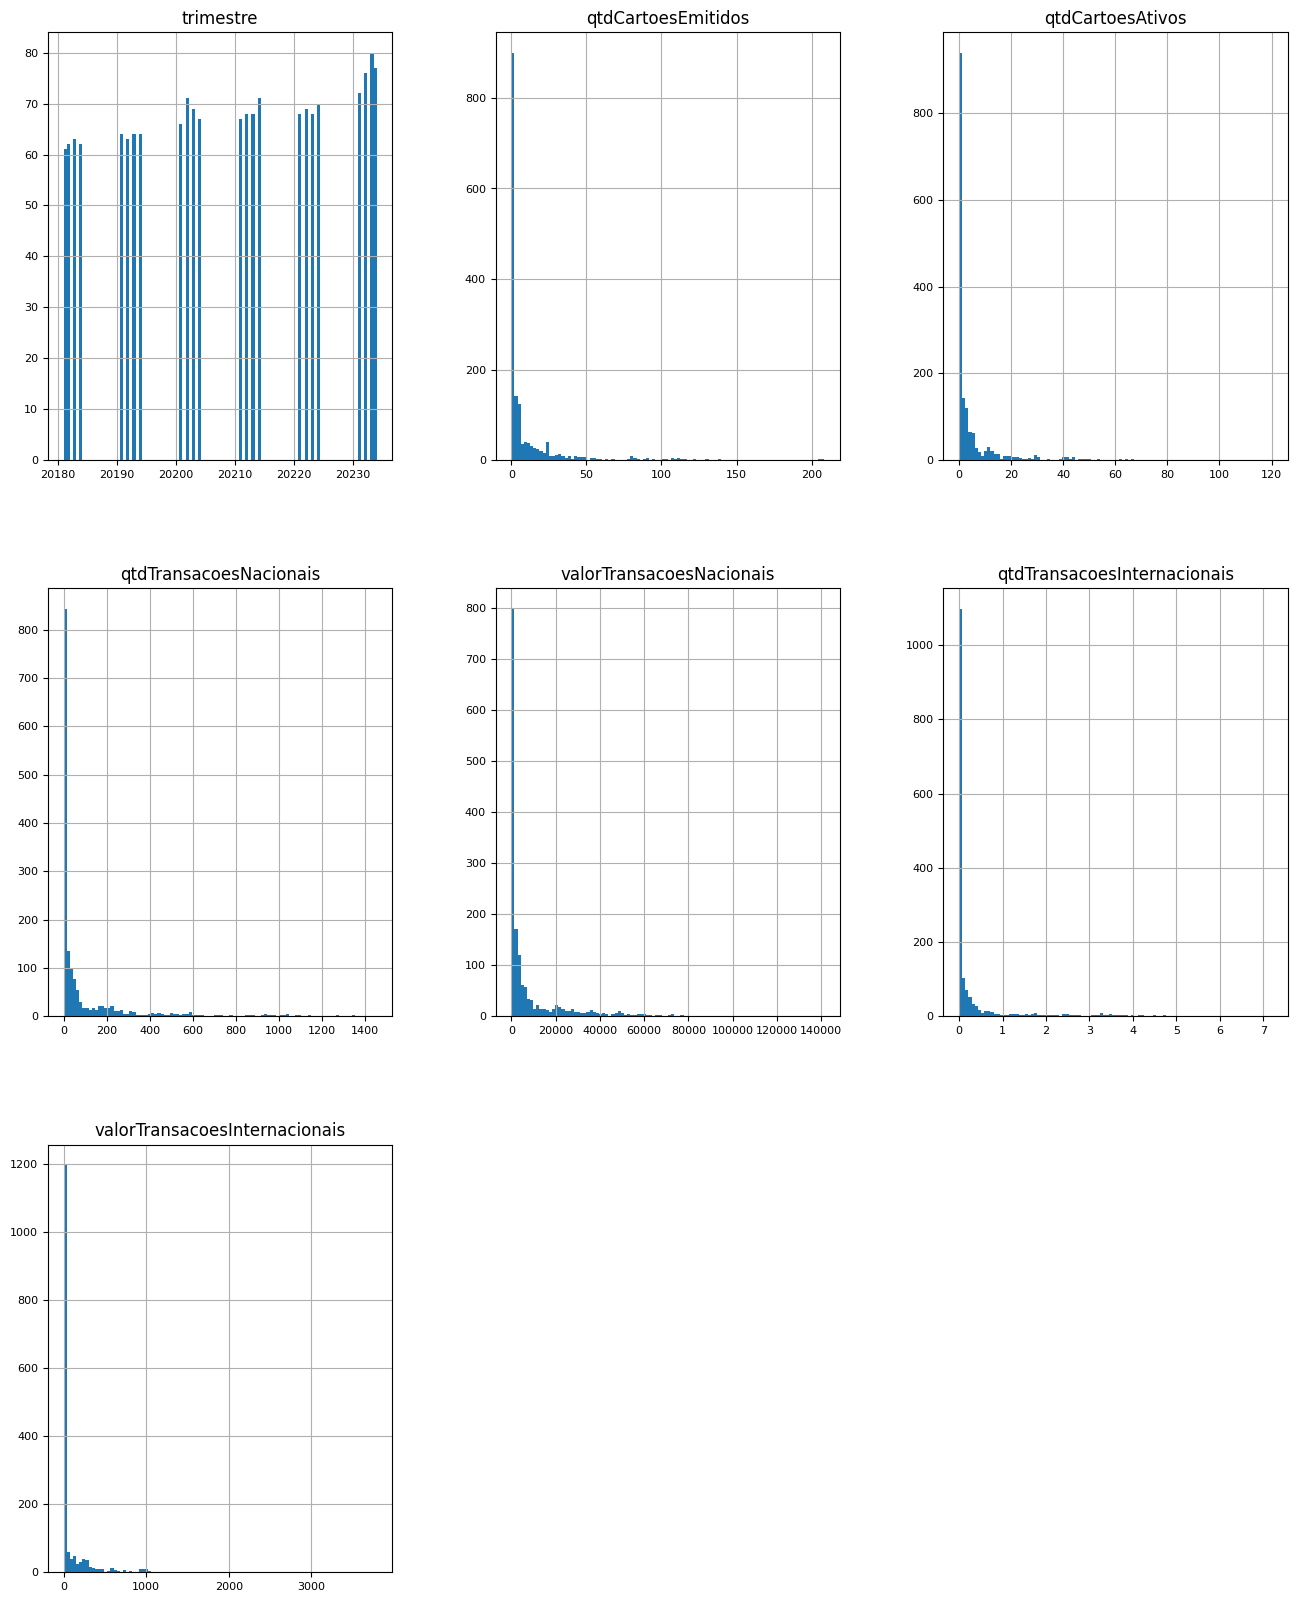

In [18]:
dados.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);
## em Milhões de unidades

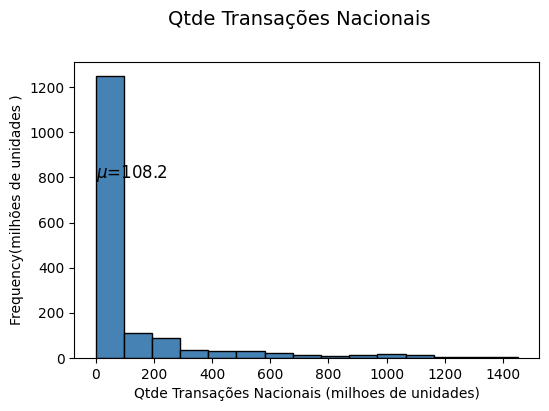

In [19]:
# Histograma
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Qtde Transações Nacionais", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Qtde Transações Nacionais (milhoes de unidades)")
ax.set_ylabel("Frequency(milhões de unidades )")
ax.text(1.2, 800, r'$\mu$='+str(round(dados['qtdTransacoesNacionais'].mean(),2)),
         fontsize=12)
freq, bins, patches = ax.hist(dados['qtdTransacoesNacionais'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


<ipython-input-20-f2d4ddc54cde>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dados['qtdTransacoesNacionais'], ax=ax1, shade=True, color='steelblue')


<Axes: xlabel='Qtde Transações Nacionais (milhões de unidades)', ylabel='Frequency (milhões de unidades)'>

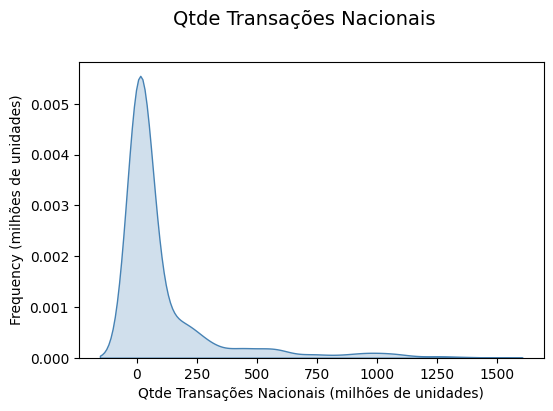

In [20]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Qtde Transações Nacionais", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Qtde Transações Nacionais (milhões de unidades)")
ax1.set_ylabel("Frequency (milhões de unidades)")
sns.kdeplot(dados['qtdTransacoesNacionais'], ax=ax1, shade=True, color='steelblue')

In [21]:
##Separando por Tipo de Bandeira

In [22]:
dados['nomeBandeira'].value_counts().sort_index()


nomeBandeira
American Express    122
Bandeira propria     88
Diners Club           4
Elo                 299
Hipercard            37
MasterCard          519
Outras               67
VISA                494
Name: count, dtype: int64

Text(0, 0.5, 'Valor Transações Nacionais (milhões de unidades)')

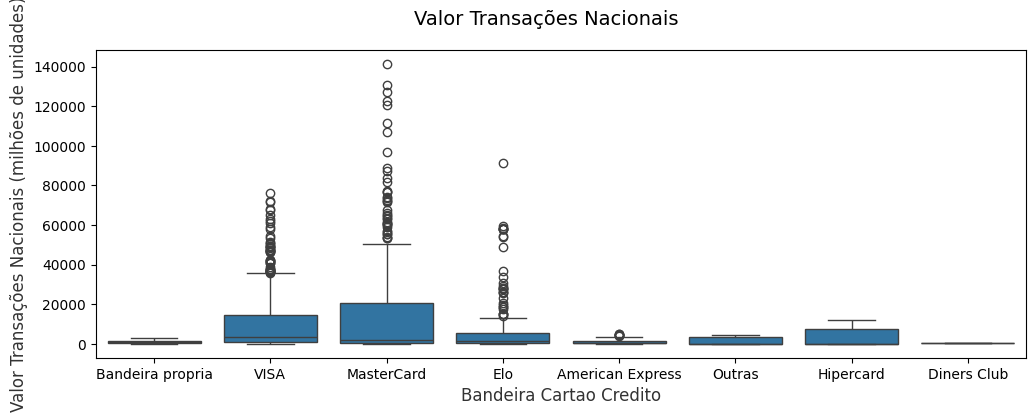

In [23]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Nacionais', fontsize=14)

sns.boxplot(x="nomeBandeira", y="valorTransacoesNacionais", data=dados,  ax=ax)
ax.set_xlabel("Bandeira Cartao Credito",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Nacionais (milhões de unidades)",size = 12,alpha=0.8)

In [24]:
dados['ano'] = dados['trimestre']//10


In [25]:
dados.head()

,trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais,ano
0,20213,Bandeira propria,Credito,Basico Nacional,1.938972,0.535612,2.741493,521.339586,0.000000,0.000000,2021
1,20232,VISA,Credito,Empresarial,3.521641,2.173436,41.594872,12547.655589,0.468389,396.967163,2023
2,20213,VISA,Debito,Intermediario,3.745393,2.347388,59.581444,4814.915281,0.000490,0.101639,2021
3,20211,MasterCard,Debito,Basico Internacional,83.088117,21.554284,567.370086,39064.611986,0.027511,9.502222,2021
4,20211,MasterCard,Credito,Premium,2.197074,1.785104,107.175156,21107.092218,1.234605,631.224037,2021


Text(0, 0.5, 'Valor Transações Nacionais (milhões de unidades)')

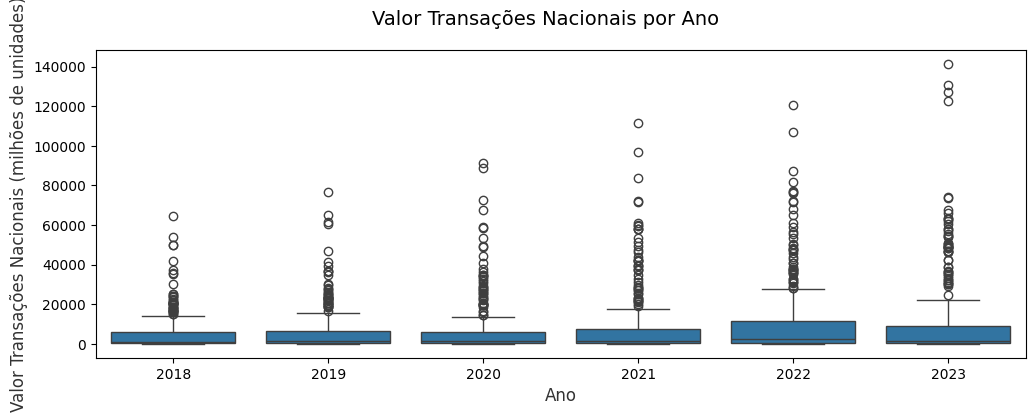

In [26]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Nacionais por Ano', fontsize=14)

sns.boxplot(x="ano", y="valorTransacoesNacionais", data=dados,  ax=ax)
ax.set_xlabel("Ano",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Nacionais (milhões de unidades)",size = 12,alpha=0.8)

Text(0, 0.5, 'Valor Transações Internacionais(milhões de unidades)')

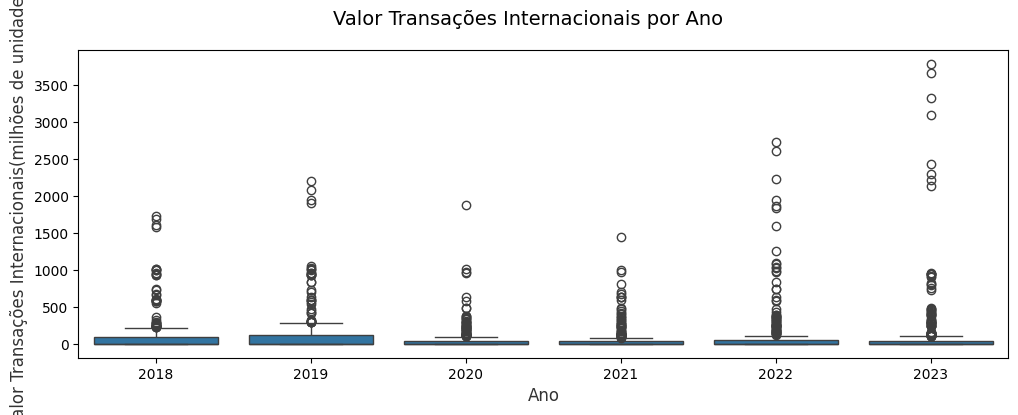

In [27]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Internacionais por Ano', fontsize=14)

sns.boxplot(x="ano", y="valorTransacoesInternacionais", data=dados,  ax=ax)
ax.set_xlabel("Ano",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Internacionais(milhões de unidades)",size = 12,alpha=0.8)

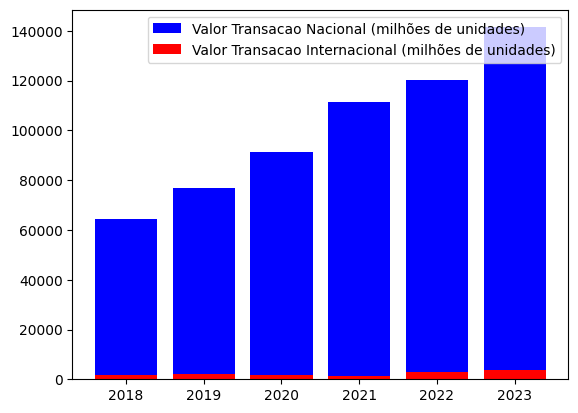

In [28]:
plt.bar(dados['ano'],dados['valorTransacoesNacionais'],label='Valor Transacao Nacional (milhões de unidades)',color='blue')
plt.bar(dados['ano'],dados['valorTransacoesInternacionais'],label='Valor Transacao Internacional (milhões de unidades)',color='red')
plt.legend()
plt.show()



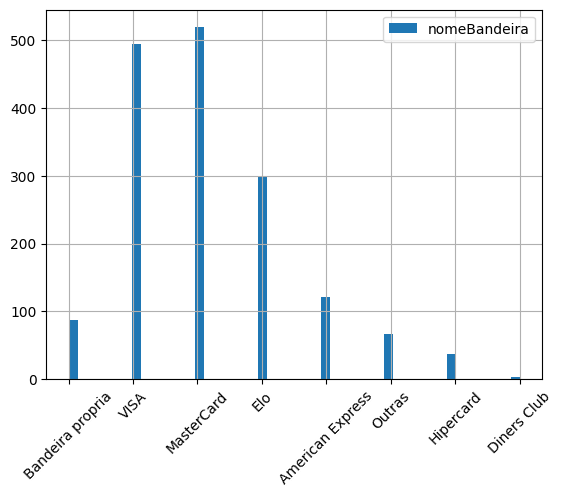

In [29]:
dados['nomeBandeira'].hist(bins = 50)
plt.xticks(rotation=45)  # Girar as etiquetas do eixo x em 45 graus
plt.legend(['nomeBandeira'], loc='upper right')  # Legenda

# Análise da utilizacao do PIX dos anos de 2019 até 2023



Fonte de dados: https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/aplicacao#!/recursos/MeiosdePagamentosMensalDA#eyJmb3JtdWxhcmlvIjp7IiRmb3JtYXQiOiJqc29uIiwiJHRvcCI6MTAwfX0=

In [30]:
dados_pix= pd.read_excel('/content/PIX Municipio.xlsx')

In [31]:
dados_pix.head()

,Ano2,Mes,Municipio_Ibge,Municipio,Estado_Ibge,Estado,Sigla_Regiao,Regiao,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ
0,2023,12,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,6.077282e+10,228750540,2.006382e+11,126799793,6.632730e+10,156754806,1.957763e+11,498519368
1,2024,3,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.789138e+10,226595220,2.222841e+11,142656893,6.134924e+10,150033005,2.147715e+11,562585516
2,2024,2,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.255003e+10,203645803,1.748611e+11,123114297,5.622909e+10,135096158,1.692570e+11,480759515
3,2023,11,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.254869e+10,200156589,1.817061e+11,126590329,5.617374e+10,138229772,1.756099e+11,512794393
4,2024,1,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.224657e+10,200528238,1.844834e+11,125074544,5.586060e+10,131279717,1.794997e+11,480566176


In [32]:
dados_pix.columns

Index(['Ano2', 'Mes', 'Municipio_Ibge', 'Municipio', 'Estado_Ibge', 'Estado',
       'Sigla_Regiao', 'Regiao', 'VL_PagadorPF', 'QT_PagadorPF',
       'VL_PagadorPJ', 'QT_PagadorPJ', 'VL_RecebedorPF', 'QT_RecebedorPF',
       'VL_RecebedorPJ', 'QT_RecebedorPJ'],
      dtype='object')

In [33]:
dados_pix.dtypes

Ano2                int64
Mes                 int64
Municipio_Ibge    float64
Municipio          object
Estado_Ibge       float64
Estado             object
Sigla_Regiao       object
Regiao             object
VL_PagadorPF      float64
QT_PagadorPF        int64
VL_PagadorPJ      float64
QT_PagadorPJ        int64
VL_RecebedorPF    float64
QT_RecebedorPF      int64
VL_RecebedorPJ    float64
QT_RecebedorPJ      int64
dtype: object

In [34]:
dados_pix.shape

(233898, 16)

In [35]:
dados_pix.nunique()

Ano2                   5
Mes                   12
Municipio_Ibge      5568
Municipio           5297
Estado_Ibge           27
Estado                28
Sigla_Regiao           5
Regiao                 6
VL_PagadorPF      233886
QT_PagadorPF      132477
VL_PagadorPJ      233196
QT_PagadorPJ       44612
VL_RecebedorPF    233892
QT_RecebedorPF    120472
VL_RecebedorPJ    233260
QT_RecebedorPJ     63955
dtype: int64

In [36]:
dados_pix.duplicated().sum()

0

In [37]:
dados_pix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233898 entries, 0 to 233897
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Ano2            233898 non-null  int64  
 1   Mes             233898 non-null  int64  
 2   Municipio_Ibge  233856 non-null  float64
 3   Municipio       233898 non-null  object 
 4   Estado_Ibge     233856 non-null  float64
 5   Estado          233898 non-null  object 
 6   Sigla_Regiao    233856 non-null  object 
 7   Regiao          233898 non-null  object 
 8   VL_PagadorPF    233898 non-null  float64
 9   QT_PagadorPF    233898 non-null  int64  
 10  VL_PagadorPJ    233898 non-null  float64
 11  QT_PagadorPJ    233898 non-null  int64  
 12  VL_RecebedorPF  233898 non-null  float64
 13  QT_RecebedorPF  233898 non-null  int64  
 14  VL_RecebedorPJ  233898 non-null  float64
 15  QT_RecebedorPJ  233898 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 28.6+ M

In [38]:
dados_pix.describe()

,Ano2,Mes,Municipio_Ibge,Estado_Ibge,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ
count,233898.000000,233898.000000,2.338560e+05,233856.000000,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05
mean,2022.095238,6.357143,3.253896e+06,32.380747,6.810688e+07,2.936943e+05,7.370646e+07,3.438983e+04,7.081877e+07,2.260852e+05,7.099454e+07,1.019989e+05
std,1.064797,3.610979,9.848690e+05,9.833484,6.219874e+08,2.479134e+06,1.481944e+09,8.641784e+05,6.597858e+08,1.888776e+06,1.406461e+09,3.221656e+06
min,2020.000000,1.000000,1.100015e+06,11.000000,4.357300e+02,4.000000e+00,0.000000e+00,0.000000e+00,2.939700e+03,1.000000e+01,0.000000e+00,0.000000e+00
25%,2021.000000,3.000000,2.512282e+06,25.000000,3.498187e+06,1.222625e+04,9.239026e+05,6.270000e+02,3.491243e+06,9.895250e+03,8.935827e+05,1.131000e+03
50%,2022.000000,6.000000,3.146354e+06,31.000000,9.657938e+06,4.046150e+04,3.347425e+06,2.092000e+03,9.668165e+06,3.109800e+04,3.311794e+06,4.736000e+03
75%,2023.000000,10.000000,4.119214e+06,41.000000,2.777104e+07,1.273390e+05,1.426495e+07,7.633750e+03,2.808137e+07,9.557775e+04,1.442663e+07,1.864700e+04
max,2024.000000,12.000000,5.300108e+06,53.000000,6.077282e+10,2.287505e+08,2.222841e+11,1.426569e+08,6.632730e+10,1.567548e+08,2.147715e+11,5.625855e+08


In [39]:
dados_pix.Municipio

0                 SÃO PAULO
1                 SÃO PAULO
2                 SÃO PAULO
3                 SÃO PAULO
4                 SÃO PAULO
                ...        
233893         CARLOS GOMES
233894              NAZÁRIA
233895       TUPANCI DO SUL
233896    AROEIRAS DO ITAIM
233897        CORONEL PILAR
Name: Municipio, Length: 233898, dtype: object

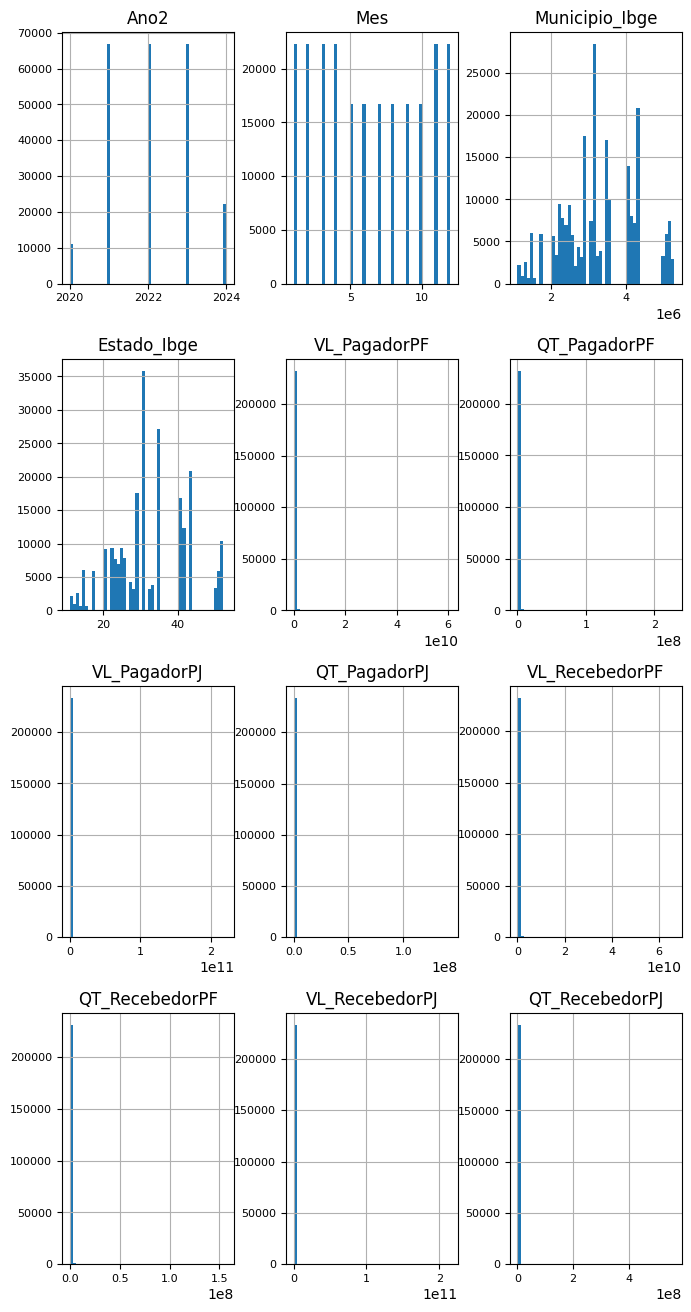

In [40]:
dados_pix.hist(figsize=(8,16),bins=50, xlabelsize=8,ylabelsize=8);

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


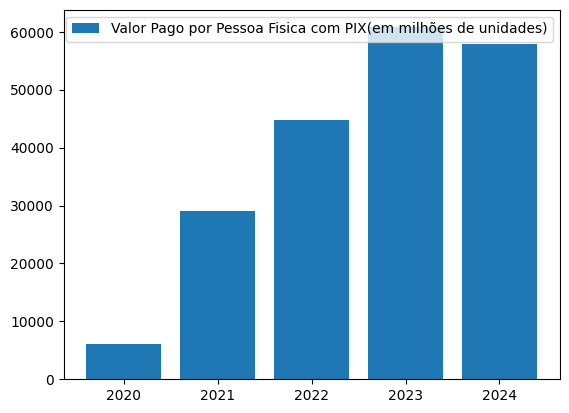

In [41]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_PagadorPF']/1000000,label='Valor Pago por Pessoa Fisica com PIX(em milhões de unidades)')
plt.legend()
plt.show()

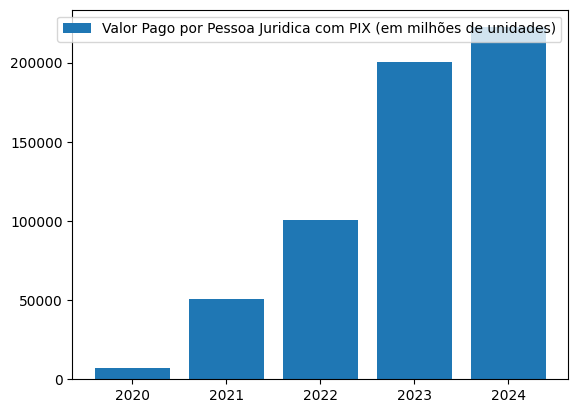

In [42]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_PagadorPJ']/1000000,label='Valor Pago por Pessoa Juridica com PIX (em milhões de unidades)')
plt.legend()
plt.show()

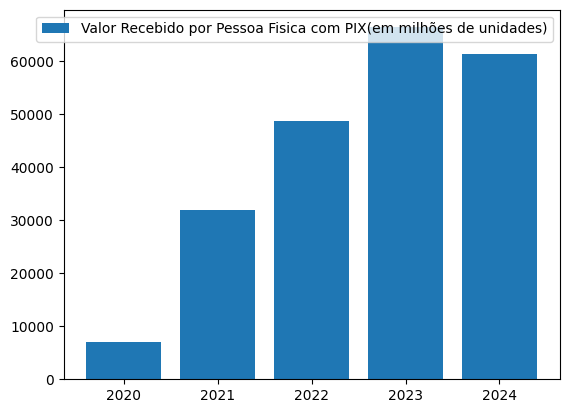

In [43]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_RecebedorPF']/1000000,label='Valor Recebido por Pessoa Fisica com PIX(em milhões de unidades)')
plt.legend()
plt.show()

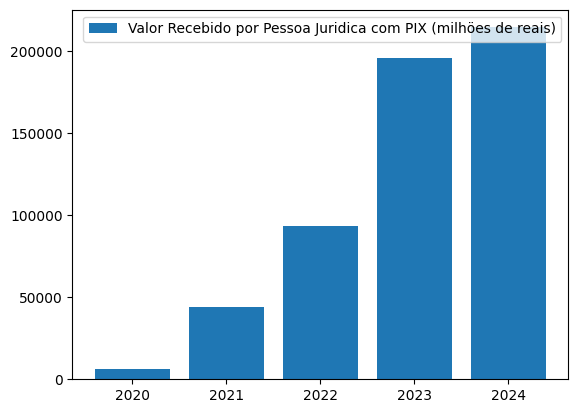

In [44]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_RecebedorPJ']/1000000,label='Valor Recebido por Pessoa Juridica com PIX (milhöes de reais)')
plt.legend()
plt.show()

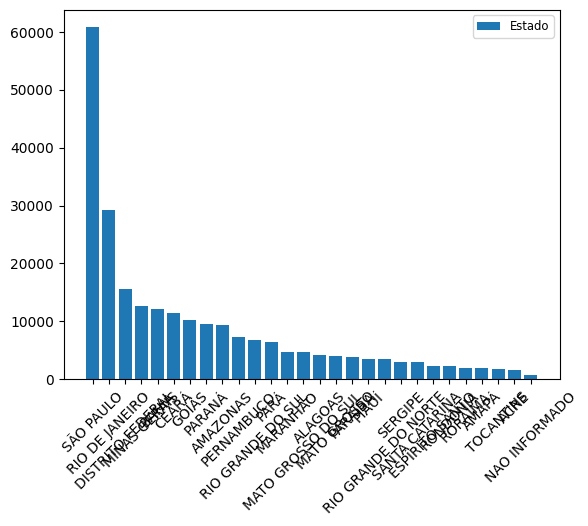

In [45]:
plt.bar(dados_pix['Estado'],dados_pix['VL_PagadorPF']/1000000,label='Valor Recebido por Pessoa Fisica com PIX por Estado(milhöes de reais)')
plt.xticks(rotation=45)  # Girar as etiquetas do eixo x em 45 graus
plt.legend(['Estado'], loc='upper right', fontsize='small')  # Legenda
plt.show()

### Juntar agora os dois dataframes com as Informações em trimestre para comparar se houve diminuição do uso de carto de crédito com o aumento do uso do PIX

In [72]:
dados_pix_cartao_juntos = pd.read_csv('/content/Pagamentos Trimestrais.csv', sep=',',decimal=',')

In [73]:
dados_pix_cartao_juntos.head()

,datatrimestre,valorPix,valorTED,valorTEC,valorCheque,valorBoleto,valorDOC,valorCartaoCredito,valorCartaoDebito,valorCartaoPrePago,...,quantidadeCheque,quantidadeBoleto,quantidadeDOC,quantidadeCartaoCredito,quantidadeCartaoDebito,quantidadeCartaoPrePago,quantidadeTransIntrabancaria,quantidadeConvenios,quantidadeDebitoDireto,quantidadeSaques
0,2023-12-31,5345148.04,10090921.81,5787.89,220273.32,2315285.80,4684.98,634044.37,259035.27,77852.90,...,52101.04,1452479.51,4664.79,4887807.14,4238120.97,2945934.26,375748.46,669793.49,3123463.37,752445.94
1,2023-09-30,4493206.46,9960251.89,4156.38,217017.83,2294274.40,10131.89,581489.65,240827.20,68104.96,...,54410.39,1487094.03,12613.82,4582591.03,4014350.21,2723840.43,318581.45,706677.56,2621551.47,767820.83
2,2023-06-30,3902133.78,10657463.13,4770.74,227207.94,2246331.56,11258.23,561912.32,238172.21,62650.45,...,56339.37,1493985.78,10328.16,4434595.66,3929786.47,2405583.92,278773.97,735860.46,2370276.63,787618.18
3,2023-03-31,3448375.93,9919602.84,4535.17,239591.94,2209119.25,7467.11,535510.93,237195.20,61111.82,...,57830.55,1510864.69,7530.90,4188773.26,3835419.38,2236579.66,259474.49,767130.10,2182269.11,595555.70
4,2022-12-31,3343343.71,10382121.63,5609.53,241004.43,2257028.05,9584.63,573149.69,264139.54,66080.88,...,62606.24,1522483.83,9871.74,4409214.01,4115667.17,2303972.43,288913.88,737698.13,1876351.58,642560.69


In [74]:
dados_pix_cartao_juntos.dtypes

datatrimestre                    object
valorPix                        float64
valorTED                        float64
valorTEC                        float64
valorCheque                     float64
valorBoleto                     float64
valorDOC                        float64
valorCartaoCredito              float64
valorCartaoDebito               float64
valorCartaoPrePago              float64
valorTransIntrabancaria         float64
valorConvenios                  float64
valorDebitoDireto               float64
valorSaques                     float64
quantidadePix                   float64
quantidadeTED                   float64
quantidadeTEC                   float64
quantidadeCheque                float64
quantidadeBoleto                float64
quantidadeDOC                   float64
quantidadeCartaoCredito         float64
quantidadeCartaoDebito          float64
quantidadeCartaoPrePago         float64
quantidadeTransIntrabancaria    float64
quantidadeConvenios             float64


In [75]:
dados_pix_cartao_juntos['ano'] = dados_pix_cartao_juntos['datatrimestre'].str.slice(0, 4)

In [86]:
soma_por_datatrimestre= dados_pix_cartao_juntos.groupby('ano',as_index=False).sum()
print(soma_por_datatrimestre)
soma_por_datatrimestre.dtypes


    ano                             datatrimestre     valorPix     valorTED  \
0  2019  2019-12-312019-09-302019-06-302019-03-31         0.00  23585864.69   
1  2020  2020-12-312020-09-302020-06-302020-03-31    149894.91  28459826.85   
2  2021  2021-12-312021-09-302021-06-302021-03-31   5204116.62  35525540.82   
3  2022  2022-12-312022-09-302022-06-302022-03-31  10890971.92  40776617.80   
4  2023  2023-12-312023-09-302023-06-302023-03-31  17188864.21  40628239.67   

   valorTEC  valorCheque  valorBoleto   valorDOC  valorCartaoCredito  \
0  22114.52   1522870.62   5942018.43  147910.93          1063899.73   
1  18773.90   1103007.79   6763041.89  172371.68          1122062.15   
2  17367.57   1048917.32   7673289.97   81410.28          1522524.43   
3  17996.94   1030795.07   8740288.40   55748.98          2049966.73   
4  19250.18    904091.03   9065011.01   33542.21          2312957.27   

   valorCartaoDebito  ...  quantidadeCheque  quantidadeBoleto  quantidadeDOC  \
0          6

ano                              object
datatrimestre                    object
valorPix                        float64
valorTED                        float64
valorTEC                        float64
valorCheque                     float64
valorBoleto                     float64
valorDOC                        float64
valorCartaoCredito              float64
valorCartaoDebito               float64
valorCartaoPrePago              float64
valorTransIntrabancaria         float64
valorConvenios                  float64
valorDebitoDireto               float64
valorSaques                     float64
quantidadePix                   float64
quantidadeTED                   float64
quantidadeTEC                   float64
quantidadeCheque                float64
quantidadeBoleto                float64
quantidadeDOC                   float64
quantidadeCartaoCredito         float64
quantidadeCartaoDebito          float64
quantidadeCartaoPrePago         float64
quantidadeTransIntrabancaria    float64


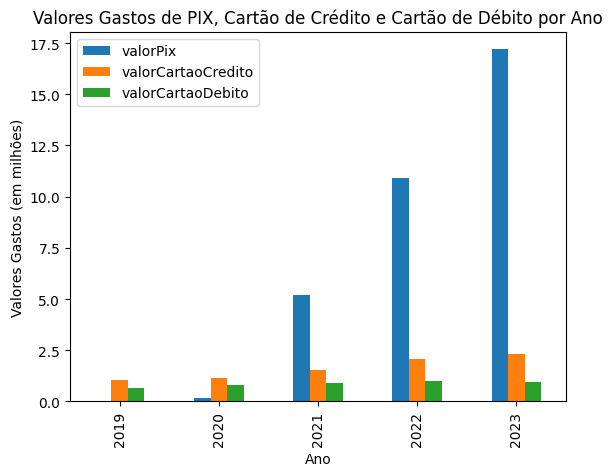

In [92]:
soma_por_datatrimestre['valorPix'] /= 1000000
soma_por_datatrimestre['valorCartaoCredito'] /= 1000000
soma_por_datatrimestre['valorCartaoDebito'] /= 1000000

# Selecionar as colunas de interesse
aux1 = soma_por_datatrimestre[['ano', 'valorPix', 'valorCartaoCredito', 'valorCartaoDebito']]

# Plotar o gráfico de barras
aux1.plot(x='ano', kind='bar', stacked=False)
plt.xlabel('Ano')
plt.ylabel('Valores Gastos (em milhões)')
plt.title('Valores Gastos de PIX, Cartão de Crédito e Cartão de Débito por Ano')
plt.show()

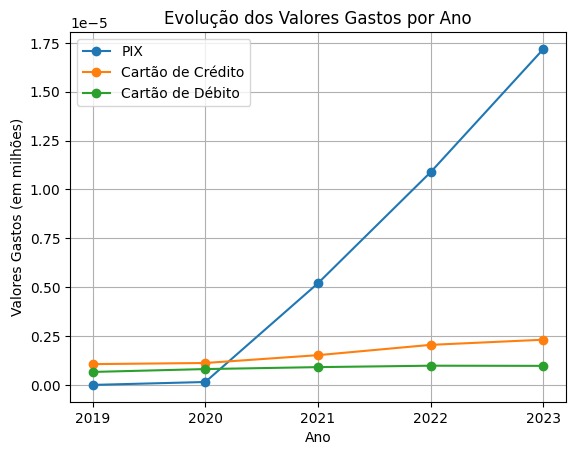

In [93]:
soma_por_datatrimestre['valorPix'] /= 1000000
soma_por_datatrimestre['valorCartaoCredito'] /= 1000000
soma_por_datatrimestre['valorCartaoDebito'] /= 1000000

# Plotar o gráfico de linha
plt.plot(soma_por_datatrimestre['ano'], soma_por_datatrimestre['valorPix'], marker='o', label='PIX')
plt.plot(soma_por_datatrimestre['ano'], soma_por_datatrimestre['valorCartaoCredito'], marker='o', label='Cartão de Crédito')
plt.plot(soma_por_datatrimestre['ano'], soma_por_datatrimestre['valorCartaoDebito'], marker='o', label='Cartão de Débito')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Valores Gastos (em milhões)')
plt.title('Evolução dos Valores Gastos por Ano')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.show()

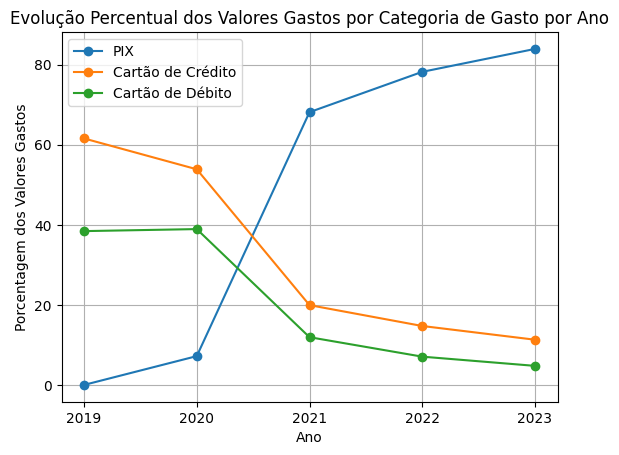

In [94]:
# Calcular o total gasto em cada ano
soma_por_datatrimestre['total_gasto'] = soma_por_datatrimestre[['valorPix', 'valorCartaoCredito', 'valorCartaoDebito']].sum(axis=1)

# Calcular os valores em porcentagem para cada categoria por ano
soma_por_datatrimestre['porcentagem_pix'] = (soma_por_datatrimestre['valorPix'] / soma_por_datatrimestre['total_gasto']) * 100
soma_por_datatrimestre['porcentagem_cartao_credito'] = (soma_por_datatrimestre['valorCartaoCredito'] / soma_por_datatrimestre['total_gasto']) * 100
soma_por_datatrimestre['porcentagem_cartao_debito'] = (soma_por_datatrimestre['valorCartaoDebito'] / soma_por_datatrimestre['total_gasto']) * 100

# Plotar o gráfico de linhas
plt.plot(soma_por_datatrimestre['ano'], soma_por_datatrimestre['porcentagem_pix'], marker='o', label='PIX')
plt.plot(soma_por_datatrimestre['ano'], soma_por_datatrimestre['porcentagem_cartao_credito'], marker='o', label='Cartão de Crédito')
plt.plot(soma_por_datatrimestre['ano'], soma_por_datatrimestre['porcentagem_cartao_debito'], marker='o', label='Cartão de Débito')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Porcentagem dos Valores Gastos')
plt.title('Evolução Percentual dos Valores Gastos por Categoria de Gasto por Ano')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.show()